we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods. 

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link 

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


Instructions

Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters
Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

In [2]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling

In [4]:
import pandas as pd 
df = pd.read_csv(r"Downloads/Microsoft_malware_dataset_min.csv")
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
...,...,...,...,...,...,...,...,...,...,...
99995,0,0.0,0.0,Core,0,1.0,0.0,1.0,th1,177
99996,1,0.0,0.0,Professional,1,1.0,0.0,1.0,rs4,206
99997,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs3,93
99998,0,NaN,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29


In [6]:
df.describe()


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [10]:
#used to detect missing values in a Pandas DataFrame.
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [12]:
#used to count the occurrences of unique values in the Wdft_IsGamer column of the DataFrame.

print(df['Wdft_IsGamer'].value_counts())

Wdft_IsGamer
0.0    69386
1.0    27199
Name: count, dtype: int64


In [16]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Fill missing values for all relevant columns using the mode
df['Wdft_IsGamer'].fillna(df['Wdft_IsGamer'].mode()[0], inplace=True)
df['Census_IsVirtualDevice'].fillna(df['Census_IsVirtualDevice'].mode()[0], inplace=True)
df['Firewall'].fillna(df['Firewall'].mode()[0], inplace=True)
df['SMode'].fillna(df['SMode'].mode()[0], inplace=True)
df['IsProtected'].fillna(df['IsProtected'].mode()[0], inplace=True)
df['Census_OSEdition'].fillna(df['Census_OSEdition'].mode()[0], inplace=True)

In [20]:
df.head(50)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [22]:
df.isnull().sum()

HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64

In [24]:
df.duplicated().sum()
# Filtering duplicate rows for inspection
duplicates = df[df.duplicated()]
duplicates.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
105,0,0.0,0.0,CoreCountrySpecific,0,1.0,0.0,1.0,rs3,43
122,0,0.0,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29
145,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,171
147,0,0.0,0.0,CoreSingleLanguage,0,1.0,0.0,1.0,rs4,29
152,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,149


In [26]:
# Checking for variations in HasDetections among duplicates
df[df.duplicated(subset=df.columns.difference(['HasDetections']), keep=False)].groupby('HasDetections').size()


HasDetections
0    47189
1    47711
dtype: int64

In [28]:
# Group by all columns except 'HasDetections', then calculate the mean of 'HasDetections'
df_aggregated = df.groupby(df.columns.difference(['HasDetections']).tolist())['HasDetections'].mean().reset_index()

# Display the new aggregated dataframe
df_aggregated.head()

,Census_HasOpticalDiskDrive,Census_IsVirtualDevice,Census_OSEdition,CountryIdentifier,Firewall,IsProtected,OsPlatformSubRelease,SMode,Wdft_IsGamer,HasDetections
0,0,0.0,Cloud,9,1.0,1.0,rs3,0.0,0.0,0.0
1,0,0.0,Cloud,12,1.0,1.0,rs3,0.0,0.0,0.5
2,0,0.0,Cloud,40,1.0,1.0,rs3,0.0,1.0,0.0
3,0,0.0,Cloud,42,1.0,1.0,rs3,0.0,0.0,0.0
4,0,0.0,Cloud,43,1.0,1.0,rs3,0.0,0.0,1.0


In [30]:
df_aggregated.shape

(11284, 10)

In [32]:
# Dropping duplicates
df = df.drop_duplicates()

In [34]:
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11284 entries, 0 to 11283
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Census_HasOpticalDiskDrive  11284 non-null  int64  
 1   Census_IsVirtualDevice      11284 non-null  float64
 2   Census_OSEdition            11284 non-null  object 
 3   CountryIdentifier           11284 non-null  int64  
 4   Firewall                    11284 non-null  float64
 5   IsProtected                 11284 non-null  float64
 6   OsPlatformSubRelease        11284 non-null  object 
 7   SMode                       11284 non-null  float64
 8   Wdft_IsGamer                11284 non-null  float64
 9   HasDetections               11284 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 881.7+ KB


In [36]:
df["Wdft_IsGamer"] = df["Wdft_IsGamer"].astype(int)
df["Census_IsVirtualDevice"] = df["Census_IsVirtualDevice"].astype(int)
df["Firewall"] = df["Firewall"].astype(int)
df["SMode"] = df["SMode"].astype(int)
df["IsProtected"] = df["IsProtected"].astype(int)

In [38]:
# Calculate the mean of HasDetections for each category in Census_OSEdition
target_mean_ose = df['Census_OSEdition'].map(df.groupby('Census_OSEdition')['HasDetections'].mean())

# Assign the encoded values back to the DataFrame
df['Census_OSEdition_encoded'] = target_mean_ose
# Calculate the mean of HasDetections for each category in OsPlatformSubRelease
target_mean_osplatform = df['OsPlatformSubRelease'].map(df.groupby('OsPlatformSubRelease')['HasDetections'].mean())

# Assign the encoded values back to the DataFrame
df['OsPlatformSubRelease_encoded'] = target_mean_osplatform
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier,Census_OSEdition_encoded,OsPlatformSubRelease_encoded
0,0,0,0,Professional,0,1,0,1,rs4,29,0.465466,0.488622
1,0,0,0,Professional,0,1,0,1,rs4,93,0.465466,0.488622
2,0,0,0,Core,0,1,0,1,rs4,86,0.458521,0.488622
3,1,0,0,Professional,0,1,0,1,rs4,88,0.465466,0.488622
4,1,0,0,Core,0,1,0,1,rs4,18,0.458521,0.488622


In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["HasDetections","OsPlatformSubRelease", "Census_OSEdition", "CountryIdentifier", 'Wdft_IsGamer','Census_HasOpticalDiskDrive',
       'Firewall', 'SMode' ])
y = df["HasDetections"]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.columns)

Index(['Census_IsVirtualDevice', 'IsProtected', 'Census_OSEdition_encoded',
       'OsPlatformSubRelease_encoded'],
      dtype='object')


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [44]:
y_pred_proba

array([0.52509653, 0.47401247, 0.45175439, ..., 0.4964476 , 0.4964476 ,
       0.45918367])

#### ROC CURVE

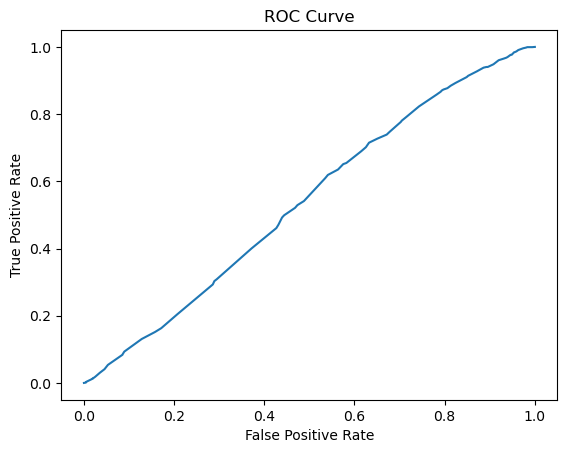

ROC AUC Score: 0.5382181464460356


In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

#### HYPERPARAMETER TUNING

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],                  
    'max_depth': [3, 5, 10, None],                     
    'min_samples_split': [2, 10, 20],                  
    'min_samples_leaf': [1, 2, 5],                    
    'class_weight': [None, 'balanced']                
}

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("New Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

Best parameters for Random Forest: {'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
New Random Forest ROC AUC Score: 0.536252348579545


In [52]:
# Feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

Feature ranking:
1. feature 0 (0.5559914897835216)
2. feature 1 (0.2632567755809544)
3. feature 2 (0.1570984931317271)
4. feature 3 (0.023653241503796763)


In [54]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validated scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validated scores: [0.52807943 0.53304375 0.53056159 0.5345951  0.53041589]
Mean CV score: 0.531339150846463


#### RANDOM FOREST

Random Forest ROC AUC Score: 0.5410658717509058


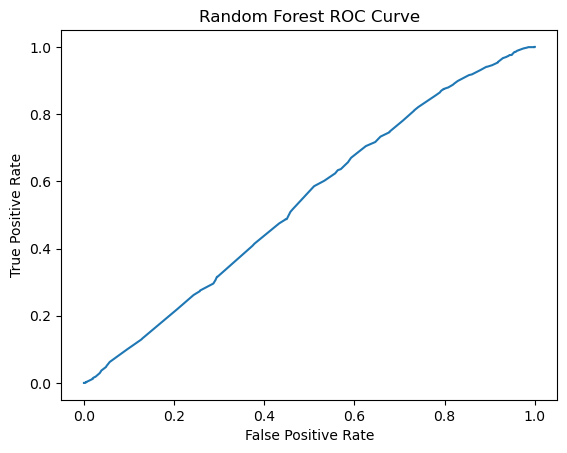

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# Instantiate the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
# Evaluate model performance
roc_auc = roc_auc_score(y_test, y_pred_proba)
print('Random Forest ROC AUC Score:', roc_auc)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Grid search for best hyperparameters
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameters and model evaluation
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
print("New Random Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))

Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}
New Random Forest ROC AUC Score: 0.5482091935756185


### UNSUPERVISED LEARNING Dropping the Target Variable: Since this is unsupervised learning, i will remove the target variable HasDetections: